## PCA Algorithm 
Using PCA to interpret The "Places Rated Almanac dataset". 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Load the data from the text file into a dataframe and apply transformation on them to visualize the data better.   


In [0]:
names = ["City","Climate","HousingCost","HlthCare","Crime","Transp","Educ","Arts","Recreat","Econ","CaseNum","Long","Lat","Pop","StNum"]
df = pd.read_csv('places.txt', delimiter= '\s+', index_col=0, names=names, header=0)


### Base-10 Log 
Replace each value in the matrix by its base-10 logarithm.  
Zero center the data by subracting it with the mean 

In [0]:
df = df.iloc[:,0:9]
df_log = df.applymap(np.log10)
df_log['Crime'] *=-1
df_log['HousingCost'] *=-1
data_log = np.array(df_log)

#Take mean and zero center the data 
mean = np.mean(data_log, axis = 0)
centeredData_log = (data_log - mean)/data_log.std(axis=0)
centeredData_log


array([[-0.0146104 ,  1.09334523, -1.81466828, ..., -0.38204575,
        -0.42048755,  1.76068679],
       [ 0.36317424, -0.0287494 ,  0.8236051 , ...,  0.9905768 ,
         1.03251583, -1.13447984],
       [-0.42557567,  0.3975793 , -0.51401725, ..., -1.52755963,
        -1.55941442, -0.16624651],
       ...,
       [ 0.12260219, -0.14520552, -0.31996628, ..., -0.36148463,
        -1.60568435, -0.47336364],
       [ 0.32971804,  0.58032282,  0.26472997, ...,  0.44181522,
        -0.55269983, -1.7046466 ],
       [ 0.57694641,  0.10677591, -1.96594574, ..., -2.05738677,
        -1.40564708, -0.74261257]])

Calculate the Eigen Value and the Eigen vectore for the centered Base 10 log data.  

In [0]:
Q = np.cov(centeredData_log.T)
eigenValues, eigenVectors = np.linalg.eig(Q)
print("\n For covariance matrix Q \n\n eigen values -- {0} \n\n eigen vectors -- \n{1}".format(eigenValues,eigenVectors))



 For covariance matrix Q 

 eigen values -- [3.30784725 1.21726176 1.10890038 0.25189379 0.31904189 0.48529568
 0.56389978 0.91004594 0.86325256] 

 eigen vectors -- 
[[-0.15794137  0.06862938 -0.79970997 -0.03009755 -0.34112819  0.15135161
  -0.21669497  0.37680952 -0.04104588]
 [ 0.3844053  -0.13920883  0.07961647 -0.04226906 -0.60610102 -0.2751971
  -0.08222008 -0.19654301 -0.57986793]
 [-0.40990962 -0.37181203  0.01947537 -0.59412763 -0.15005752 -0.13497502
   0.5348756   0.11252206 -0.02956935]
 [ 0.2591017  -0.47413246  0.12846722  0.05101188 -0.42012549  0.10950357
  -0.13990092  0.04229962  0.692171  ]
 [-0.37488902 -0.14148642  0.14106828 -0.13584327 -0.11883253  0.67856704
  -0.3238914  -0.43007675 -0.19141608]
 [-0.27432537 -0.45235526  0.24105584  0.1101242   0.21117489 -0.26209582
  -0.52658273  0.45694297 -0.22474374]
 [-0.47384706 -0.1044102  -0.01102628  0.74672678 -0.2598673  -0.12049856
   0.32105707 -0.1468813  -0.01193024]
 [-0.35341176  0.29194243 -0.04181639 -0.2

From the above Eigen values We can see that the First Eigen Vector corresponds to the Principal Component 1 and the second Eigen Vectore corresponds to the principal component 2 as the Eigen values and the Eigen vectors are ordered in a decreasing order   

Principal Component 1 coreleated the most with Factor 3 as it has the maximun absolutve value in the Eigen vector    
Principal Component 2 coreleated tjhe most with Factor 5 as it has the maximun absolutve value in the Eigen vector  

In [0]:
print("Principal Component 1 Factor" )
print(np.argmax(abs(eigenVectors[0]), axis=0)+1)
print(eigenVectors[0].max())

print("\nPrincipal Component 2 Factor - " )
print(np.argmax(abs(eigenVectors[1]), axis=0)+1)
print(eigenVectors[1].max())


Principal Component 1 Factor
3
0.3768095243253605

Principal Component 2 Factor - 
5
0.38440529512942356


Apply PCA on the base-10 logarithm dataset  
Project the data points onto the first two principal components

In [0]:
pca = PCA(n_components=2, svd_solver='full')
data_projected = pca.fit_transform(centeredData_log) 
prinComp= pd.DataFrame(data = data_projected, columns = ['PC1', 'PC2'])
print("coefficients of PCA \n", prinComp)

## The First 2 Principal Components correlate the most with the 9 factors. 

coefficients of PCA 
           PC1       PC2
0   -1.200682  1.476616
1    0.939742 -0.248828
2   -2.351070  0.340247
3    1.381363 -1.616198
4    2.441079  0.191886
..        ...       ...
324  0.147322 -1.865869
325 -1.178694  1.106406
326 -1.832309 -1.333580
327 -0.358268 -1.334945
328 -2.911026  1.255275

[329 rows x 2 columns]


Project the data points onto the first two principal components

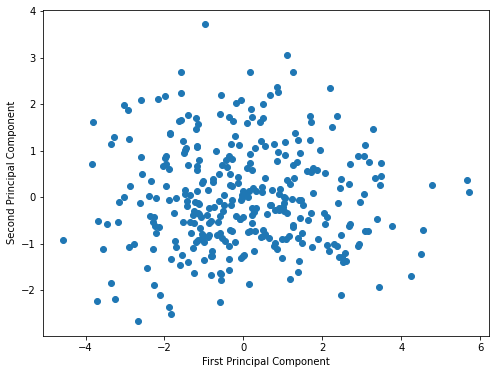

In [0]:
plt.figure(figsize =(8, 6))   
plt.scatter(data_projected[:, 0], data_projected[:, 1]) 

# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 
plt.show()

Identify the Outliers in by checking the plot and applying thesholds 

In [0]:
result = np.where((data_projected[:,0] > 5) | (data_projected[:,1] > 3.5))
# print(result)

#Cities that are Outliers 
df.iloc[result[0],:]

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
City,,,,,,,,,
"Midland,TX",603,8672,97,1166,5310,2416,438,1502,9980
"New-York,NY",638,13358,7850,2498,8625,2984,56745,3579,5338
"San-Francisco,CA",910,17158,3726,1619,8299,3371,14226,4600,6063


### ZScore 
Modify the Data using teh ZScore 

In [0]:
zscoreData = np.array(df)
zscore_data = (zscoreData - zscoreData.mean(axis = 0))/zscoreData.std(axis=0)

zscore_data[3] = abs(zscore_data[3])*-1
zscore_data[1] = abs(zscore_data[1])*-1
print(zscore_data)


[[-0.14700595 -0.90129655 -0.9473398  ... -0.46489336 -0.54664636
   1.94643332]
 [-0.30066422 -0.08756979 -0.46956805 ... -0.52060395 -0.97444164
  -1.08546728]
 [-0.58638594 -0.42305363 -0.56690154 ... -0.62863952 -1.22351192
  -0.25430354]
 ...
 [ 0.01050762  0.01026216 -0.47204161 ... -0.45928414 -1.24458649
  -0.53505218]
 [ 0.25921328 -0.55657536 -0.08860777 ... -0.07634681 -0.64334144
  -1.50659023]
 [ 0.57424044 -0.19799814 -0.97230294 ... -0.65344954 -1.15037077
  -0.76777803]]


In [0]:
Q = np.cov(zscore_data.T)
eigenValuesZ, eigenVectorsZ = np.linalg.eig(Q)
print("\n For covariance matrix Q \n\n eigen values -- {0} \n\n eigen vectors -- \n{1}".format(eigenValues,eigenVectors))



 For covariance matrix Q 

 eigen values -- [3.30784725 1.21726176 1.10890038 0.25189379 0.31904189 0.48529568
 0.56389978 0.91004594 0.86325256] 

 eigen vectors -- 
[[-0.15794137  0.06862938 -0.79970997 -0.03009755 -0.34112819  0.15135161
  -0.21669497  0.37680952 -0.04104588]
 [ 0.3844053  -0.13920883  0.07961647 -0.04226906 -0.60610102 -0.2751971
  -0.08222008 -0.19654301 -0.57986793]
 [-0.40990962 -0.37181203  0.01947537 -0.59412763 -0.15005752 -0.13497502
   0.5348756   0.11252206 -0.02956935]
 [ 0.2591017  -0.47413246  0.12846722  0.05101188 -0.42012549  0.10950357
  -0.13990092  0.04229962  0.692171  ]
 [-0.37488902 -0.14148642  0.14106828 -0.13584327 -0.11883253  0.67856704
  -0.3238914  -0.43007675 -0.19141608]
 [-0.27432537 -0.45235526  0.24105584  0.1101242   0.21117489 -0.26209582
  -0.52658273  0.45694297 -0.22474374]
 [-0.47384706 -0.1044102  -0.01102628  0.74672678 -0.2598673  -0.12049856
   0.32105707 -0.1468813  -0.01193024]
 [-0.35341176  0.29194243 -0.04181639 -0.2

From the above Eigen values We can see that the First Eigen Vector corresponds to the Principal Component 1 and the second Eigen Vectore corresponds to the principal component 2 as the Eigen values and the Eigen vectors are ordered in a decreasing order   

Principal Component 1 coreleated the most with Factor 3 as it has the maximun absolutve value in the Eigen vector    
Principal Component 2 coreleated tjhe most with Factor 8 as it has the maximun absolutve value in the Eigen vector  

In [0]:
print("Principal Component 1 Factor" )
print(np.argmax(abs(eigenVectorsZ[0]), axis=0)+1)
print(eigenVectorsZ[0].max())

print("\nPrincipal Component 2 Factor - " )
print(np.argmax(abs(eigenVectorsZ[1]), axis=0)+1)
print(eigenVectorsZ[1].max())


Principal Component 1 Factor
3
0.7100968574788746

Principal Component 2 Factor - 
8
0.5054951475375103


Apply PCA on the ZScore dataset  
Project the data points onto the first two principal components

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
zscore_pca = pca.fit_transform(zscore_data)
zscore_prinComp = pd.DataFrame(data = zscore_pca, columns = ['PC1', 'PC2'])
print("coefficients of PCA \n",zscore_prinComp)


coefficients of PCA 
           PC1       PC2
0   -1.019423  1.010556
1   -1.553469 -0.227711
2   -1.864915  0.058223
3   -1.991790  0.519972
4    2.173049  0.315150
..        ...       ...
324 -0.125491 -1.654023
325 -1.119422  0.695128
326 -1.698734 -0.948904
327 -0.753445 -1.168312
328 -1.715437  0.619603

[329 rows x 2 columns]


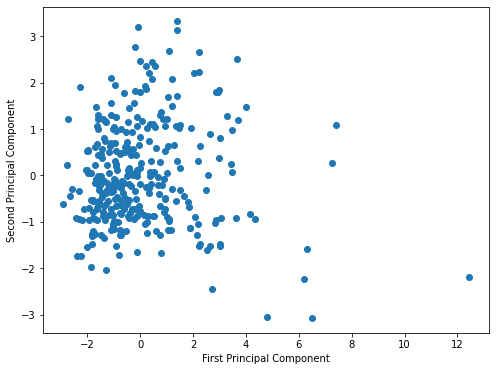

In [0]:
plt.figure(figsize =(8, 6))   
plt.scatter(zscore_pca[:, 0], zscore_pca[:, 1]) 

# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 
plt.show()

Identify the Outliers in by checking the plot and applying thesholds 

In [0]:
result = np.where(zscore_pca[:,0]>10)
# print(result)

df.iloc[result[0],:]


,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
City,,,,,,,,,
"New-York,NY",638,13358,7850,2498,8625,2984,56745,3579,5338


## The ZScore has clustered the data more closely and thereby clearly distinguishing the outliers in the process 